<a href="https://colab.research.google.com/github/Amit-Padye/Scraping/blob/main/Scrap_table_from_pdf_camelot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install "camelot-py[plot]"

In [1]:
!pip install "camelot-py[cv]"
!apt install python3-tk ghostscript

     |████████████████████████████████| 40 kB 31 kB/s 
     |████████████████████████████████| 77 kB 4.4 MB/s 
     |████████████████████████████████| 5.6 MB 24.9 MB/s 
     |████████████████████████████████| 11.7 MB 45.6 MB/s 
     |████████████████████████████████| 3.6 MB 43.9 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=c61622caf5d76ad30e8dbd4d1d3597c08fd716ffa9528407fb0f9edebce1d11b
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  

In [2]:
import camelot

In [3]:
!which gs

/usr/bin/gs


In [23]:
tables=camelot.read_pdf('/content/foo.pdf')

In [24]:
tables[0].df

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


#**background_lines**

In [18]:
tables=camelot.read_pdf('/content/background_lines.pdf',process_background=True)

In [22]:
tables[1].df

,0,1,2,3,4,5,6,7
0,State,Date,Halt \nstations,Halt \ndays,Persons \ndirectly \nreached\n(in lakh),Persons \ntrained,Persons \ncounseled,Persons \ntested\nfor HIV
1,Delhi,1.12.2009,8,17,1.29,"3,665","2,409","1,000"
2,Rajasthan,2.12.2009 to \n19.12.2009,,,,,,
3,Gujarat,20.12.2009 to \n3.1.2010,6,13,6.03,"3,810","2,317","1,453"
4,Maharashtra,4.01.2010 to \n1.2.2010,13,26,1.27,"5,680","9,027","4,153"
5,Karnataka,2.2.2010 to \n22.2.2010,11,19,1.80,"5,741","3,658","3,183"
6,Kerala,23.2.2010 to \n11.3.2010,9,17,1.42,"3,559","2,173",855
7,Total,,47,92,11.81,"22,455","19,584","10,644"


# **Visual debugging**

**text**

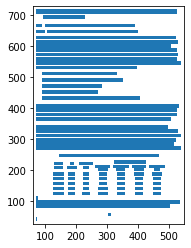

In [26]:
camelot.plot(tables[0], kind='text').show()

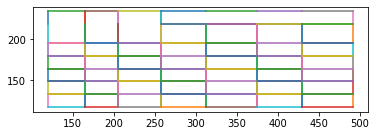

In [27]:
camelot.plot(tables[0], kind='grid').show()

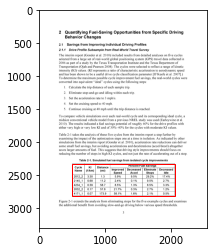

In [33]:
camelot.plot(tables[0], kind='contour').show()

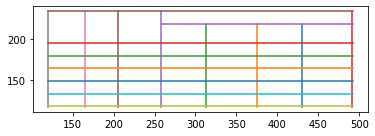

In [30]:
camelot.plot(tables[0], kind='line').show()

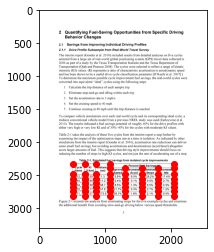

In [31]:
camelot.plot(tables[0], kind='joint').show()

##**Specify table areas**

In [47]:
tables = camelot.read_pdf('/content/foo.pdf', flavor='stream', table_areas=['100,275,480,100'] )
tables[0].df

,0,1,2,3,4,5,6
0,reducing the number of stops in high KI cycles...,,,,,,
1,,Table 2-1. Simulated fuel savings from isolate...,,,,,
2,,,,,,Percent Fuel Savings,
3,Cycle,KI,Distance,,,,
4,,,,Improved,Decreased,Eliminate,Decreased
5,Name,(1/km),(mi),,,,
6,,,,Speed,Accel,Stops,Idle
7,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
8,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
9,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%


###**Note**
table_areas accepts strings of the form x1,y1,x2,y2 where (x1, y1) -> top-left and (x2, y2) -> bottom-right in PDF coordinate space. In PDF coordinate space, the bottom-left corner of the page is the origin, with coordinates (0, 0).

##**Specify table regions**

In [42]:
tables = camelot.read_pdf('/content/foo.pdf', table_regions=['100,275,480,100'])
tables[0].df

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


##**Specify column separators**


In cases like these, where the text is very close to each other, it is possible that Camelot may guess the column separators’ coordinates incorrectly. To correct this, you can explicitly specify the x coordinate for each column separator by plotting the text on the page.


For example, if you have specified two table areas, table_areas=['12,54,43,23', '20,67,55,33'], and only want to specify column separators for the first table, you can pass an empty string for the second table in the column separators’ list like this, columns=['10,120,200,400', ''].

In [57]:
tables = camelot.read_pdf('/content/column_separators.pdf', flavor='stream', columns=['72,95,209,327,442,529,566,606,683'])
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,,FEBRUARY 2014 M27 (BUS),,,,,,,,
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMISSION,,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER TYPE DBA NAME,,,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,,648765 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,,,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,,648766 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,STREET,TULSA,OK,74115,-,2014/12/16
8,,82030 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,,OK,73159,(405) 680-3701,2014/09/14
9,,509462 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,,OK,74115,(918) 831-6302,2014/08/19


Ah! Since PDFMiner merged the strings, “NUMBER”, “TYPE” and “DBA NAME”, all of them were assigned to the same cell. Let’s see how we can fix this in the next section.

## **Split text along separators**

In [58]:
tables = camelot.read_pdf('column_separators.pdf', flavor='stream', columns=['72,95,209,327,442,529,566,606,683'], split_text=True)
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,FEB,RUAR,Y 2014 M27 (BUS),,,,,,,
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMIS,SION,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER,TYPE,DBA NAME,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,648765,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,648766,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,STREET,TULSA,OK,74115,-,2014/12/16
8,82030,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,(405) 680-3701,2014/09/14
9,509462,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7777 EAST APACHE DRIVE,TULSA,OK,74115,(918) 831-6302,2014/08/19


##**Flag superscripts and subscripts**

handle squred term

In [59]:
tables = camelot.read_pdf('/content/superscript.pdf', flavor='stream', flag_size=True)
tables[0].df

,0,1,2,3,4,5,6,7,8,9,10
0,States,Total,Market,NSSF,WMA,Loans,Loans,Loans,Loans,Loans,Loans
1,,Internal,Loans,,from,from,from,from,from,from SBI,from
2,,Debt,,,RBI,Banks,LIC,GIC,NABARD,& Other,NCDC
3,,,,,,& FIs,,,,Banks,
4,1,2=,3,4,5,6=,7,8,9,10,11
5,,(3 to 6)+14,,,,(7 to13),,,,,
6,Andhra Pradesh,48.11,40.45,-,3.26,4.4,2.62,-,0.91,-,0.25
7,Arunachal Pradesh,1.23,1.1,-,-,0.13,-,-,-,-,-
8,Assam,12.69,10.02,-,2.41,0.26,0.08,-,-0.06,0.01,0.24
9,Bihar,40.75,41.54,-,-,-1.42,0.19,-,-1.01,-0.36,0.2


##**Strip characters from text**

You can strip unwanted characters like spaces, dots and newlines from a string using the strip_text keyword argument. Take a look at this PDF as an example, the text at the start of each row contains a lot of unwanted spaces, dots and newlines.

In [60]:
tables = camelot.read_pdf('/content/Strip characters from text.pdf', flavor='stream', strip_text=' .\n')
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,ProgramRepresentsarrestsreported(notcharged)by...,,,,,,,,,
1,bytheFBISomepersonsmaybearrestedmorethanoncedu...,,,,,,,,,
2,couldrepresentmultiplearrestsofthesamepersonSe...,,,,,,,,,
3,,,Total,,,Male,,,Female,
4,Offensecharged,,Under18,18years,,Under18,18years,,Under18,18years
5,,Total,years,andover,Total,years,andover,Total,years,andover
6,Total,"11,0626","1,5400","9,5226","8,2633","1,0716","7,1917","2,7992",4683,"2,3309"
7,Violentcrime,4679,691,3988,3802,565,3237,877,126,752
8,Murderandnonnegligent,,,,,,,,,
9,manslaughter,100,09,91,90,09,81,11,–,10


**Stream**


Stream can be used to parse tables that have whitespaces between cells to simulate a table structure. It is built on top of PDFMiner’s functionality of grouping characters on a page into words and sentences, using margins


**Lattice**


Lattice is more deterministic in nature, and it does not rely on guesses. It can be used to parse tables that have demarcated lines between cells, and it can automatically parse multiple tables present on a page.

It starts by converting the PDF page to an image using ghostscript, and then processes it to get horizontal and vertical line segments by applying a set of morphological transformations (erosion and dilation) using OpenCV



https://camelot-py.readthedocs.io/en/master/user/how-it-works.html#stream


## **Improve guessed table areas**

While using Stream, automatic table detection can fail for PDFs like this one. That’s because the text is relatively far apart vertically, which can lead to shorter textedges being calculated.

**Let’s see the table area that is detected by default.**

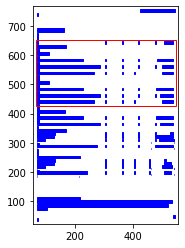

In [61]:
tables = camelot.read_pdf('/content/edge_tol.pdf', flavor='stream')
camelot.plot(tables[0], kind='contour').show()

In [63]:
tables[0].df

,0,1,2
0,,,2016
1,(all amounts in EUR),,
2,C,lass A,
3,N,et Asset Value at 31 December,"5,111,372"
4,N,umber of outstanding units at 31 December,"49,136"
5,N,et Asset Value per unit at 31 December,104.03
6,C,lass B,
7,N,et Asset Value at 31 December,"49,144,825"
8,N,umber of outstanding units at 31 December,"471,555"
9,N,et Asset Value per unit at 31 December,104.22


To improve the detected area, you can increase the edge_tol (default: 50) value to counter the effect of text being placed relatively far apart vertically. Larger edge_tol will lead to longer textedges being detected, leading to an improved guess of the table area. Let’s use a value of 500.

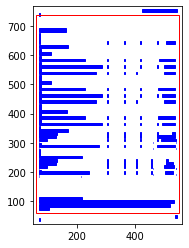

In [64]:
tables = camelot.read_pdf('/content/edge_tol.pdf', flavor='stream', edge_tol=500)
camelot.plot(tables[0], kind='contour').show()

In [66]:
tables[0].df

,0,1
0,Key figures,
1,,2016
2,(all amounts in EUR),
3,C\nlass A,
4,N\net Asset Value at 31 December,"5,111,372"
5,N\number of outstanding units at 31 December,"49,136"
6,N\net Asset Value per unit at 31 December,104.03
7,C\nlass B,
8,N\net Asset Value at 31 December,"49,144,825"
9,N\number of outstanding units at 31 December,"471,555"


# **Improve guessed table rows**


You can pass row_tol=<+int> to group the rows closer together, as shown below.

In [67]:
tables = camelot.read_pdf('/content/column_separators.pdf', flavor='stream')
tables[0].df

,0,1,2,3,4,5
0,FEBRUARY 2014 M27 (BUS),,,,,
1,,OF ACTIVE LICENSES,,,,3/19/2014
2,,OKLAHOMA ABLE COMMISSION,,,,
3,LICENSE,PREMISE,,,,
4,NUMBER TYPE DBA NAME,LICENSEE NAME\nADDRESS\nCITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,648765 AAA,ALLEGIANT AIR ALLEGIANT AIR...,OK,73159,-,2014/12/03
6,,7777 EAST APACHE,,,,
7,648766 AAA,ALLEGIANT AIR ALLEGIANT AIR...,OK,74115,-,2014/12/16
8,82030 AAA,AMERICAN AIRLINES AMERICAN AIRLINES ...,OK,73159,(405) 680-3701,2014/09/14
9,509462 AAA,AMERICAN AIRLINES AMERICAN AIRLINES ...,OK,74115,(918) 831-6302,2014/08/19


In [71]:
tables = camelot.read_pdf('/content/column_separators.pdf', flavor='stream', row_tol=10)
tables[0].df

,0,1,2,3,4,5
0,FEBRUARY 2014 M27 (BUS),OF ACTIVE LICENSES,,,,3/19/2014
1,,OKLAHOMA ABLE COMMISSION,,,,
2,LICENSE,PREMISE,,,,
3,NUMBER TYPE DBA NAME,LICENSEE NAME\nADDRESS\nCITY,ST,ZIP,PHONE NUMBER,EXPIRES
4,648765 AAA,ALLEGIANT AIR ALLEGIANT AIR...,OK,73159,-,2014/12/03
5,,7777 EAST APACHE,,,,
6,648766 AAA,ALLEGIANT AIR ALLEGIANT AIR...,OK,74115,-,2014/12/16
7,82030 AAA,AMERICAN AIRLINES AMERICAN AIRLINES ...,OK,73159,(405) 680-3701,2014/09/14
8,509462 AAA,AMERICAN AIRLINES AMERICAN AIRLINES ...,OK,74115,(918) 831-6302,2014/08/19
9,,AMERICAN EAGLE,,,,


# **Detect short lines**

There might be cases while using Lattice when smaller lines don’t get detected. The size of the smallest line that gets detected is calculated by dividing the PDF page’s dimensions with a scaling factor called line_scale. By default, its value is 15.

As you can guess, the larger the line_scale, the smaller the size of lines getting detected

# **Warning**
Making line_scale very large (>150) will lead to text getting detected as lines.

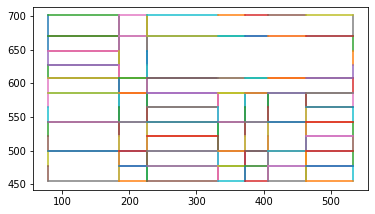

In [72]:
tables = camelot.read_pdf('/content/short_lines.pdf')
camelot.plot(tables[0], kind='grid').show()

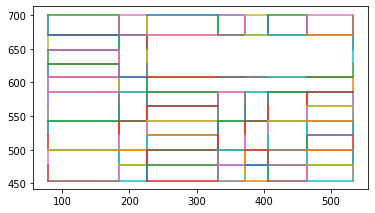

In [73]:
tables = camelot.read_pdf('/content/short_lines.pdf', line_scale=40)
camelot.plot(tables[0], kind='grid').show()

In [74]:
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,2400,All the available individuals,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,All the individuals partaking meals in the HH,,,,
5,Blood Pressure #,2400,Men (≥ 18yrs),10%,95%,20%,1728
6,,,Women (≥ 18 yrs),,,,1728
7,Fasting blood glucose,2400,Men (≥ 18 yrs),5%,95%,20%,1825
8,,,Women (≥ 18 yrs),,,,1825
9,Knowledge &\nPractices on HTN &\nDM,2400,Men (≥ 18 yrs),-,-,-,1728


## **Shift text in spanning cells**


By default, the Lattice method shifts text in spanning cells, first to the left and then to the top, as you can observe in the output table above. However, this behavior can be changed using the shift_text keyword argument. Think of it as setting the gravity for a table — it decides the direction in which the text will move and finally come to rest.

shift_text expects a list with one or more characters from the following set: ('', l', 'r', 't', 'b'), which are then applied in order. The default, as we discussed above, is ['l', 't'].

We’ll use the PDF from the previous example. Let’s pass shift_text=[''], which basically means that the text will experience weightlessness! (It will remain in place.)

In [75]:
tables = camelot.read_pdf('/content/short_lines.pdf', line_scale=40, shift_text=[''])
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,,,,,,
2,Clinical Examination,2400,,All the available individuals,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,,All the individuals partaking meals in the HH,,,
5,,,Men (≥ 18yrs),,,,1728
6,Blood Pressure #,2400,Women (≥ 18 yrs),10%,95%,20%,1728
7,,,Men (≥ 18 yrs),,,,1825
8,Fasting blood glucose,2400,Women (≥ 18 yrs),5%,95%,20%,1825
9,Knowledge &\nPractices on HTN &,2400,Men (≥ 18 yrs),-,-,-,1728


No surprises there — it did remain in place (observe the strings “2400” and “All the available individuals”). Let’s pass shift_text=['r', 'b'] to set the gravity to right-bottom and move the text in that direction.

In [76]:
tables = camelot.read_pdf('short_lines.pdf', line_scale=40, shift_text=['r', 'b'])
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,,,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,2400,,,,,All the available individuals
4,Diet survey,1200,,,,,All the individuals partaking meals in the HH
5,,,Men (≥ 18yrs),,,,1728
6,Blood Pressure #,2400,Women (≥ 18 yrs),10%,95%,20%,1728
7,,,Men (≥ 18 yrs),,,,1825
8,Fasting blood glucose,2400,Women (≥ 18 yrs),5%,95%,20%,1825
9,,2400,Men (≥ 18 yrs),-,-,-,1728


##**Copy text in spanning cells**

You can copy text in spanning cells when using Lattice, in either the horizontal or vertical direction, or both. This behavior is disabled by default.

copy_text expects a list with one or more characters from the following set: ('v', 'h'), which are then applied in order.

Let’s try it out on this PDF. First, let’s check out the output table to see if we need to use any other configuration parameters.

In [77]:
tables = camelot.read_pdf('/content/copy_text.pdf')
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Sl. \nNo.,Name of \nState/UT,Name of \nDistrict,Disease/ Illness,No. of \nCases,No. of \nDeaths,Date of \nstart of \noutbreak,Date of \nreporting,Current \nStatus,Comments/ Action taken
1,1,Kerala,Kollam,i. Food \nPoisoning,19,0,31/12/13,03/01/14,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,..."
2,2,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,11,0,03/01/14,04/01/14,Under \ncontrol,Cases of fever reported from Village Golharw...
3,3,Odisha,Kalahandi,iii. Food \nPoisoning,42,0,02/01/14,03/01/14,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...
4,4,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,145,0,04/01/14,05/01/14,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...
5,,,Birbhum,v. Food \nPoisoning,199,0,31/12/13,31/12/13,Under \ncontrol,An outbreak of food poisoning reported f...
6,,,Howrah,vi. Viral \nHepatitis A \n&E,85,0,26/12/13,27/12/13,Under \nsurveillance,Outbreak of \njaundice reported from urban...


In [78]:
tables = camelot.read_pdf('copy_text.pdf', copy_text=['v'])
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Sl. \nNo.,Name of \nState/UT,Name of \nDistrict,Disease/ Illness,No. of \nCases,No. of \nDeaths,Date of \nstart of \noutbreak,Date of \nreporting,Current \nStatus,Comments/ Action taken
1,1,Kerala,Kollam,i. Food \nPoisoning,19,0,31/12/13,03/01/14,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,..."
2,2,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,11,0,03/01/14,04/01/14,Under \ncontrol,Cases of fever reported from Village Golharw...
3,3,Odisha,Kalahandi,iii. Food \nPoisoning,42,0,02/01/14,03/01/14,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...
4,4,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,145,0,04/01/14,05/01/14,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...
5,4,West Bengal,Birbhum,v. Food \nPoisoning,199,0,31/12/13,31/12/13,Under \ncontrol,An outbreak of food poisoning reported f...
6,4,West Bengal,Howrah,vi. Viral \nHepatitis A \n&E,85,0,26/12/13,27/12/13,Under \nsurveillance,Outbreak of \njaundice reported from urban...


# **Tweak layout generation**

Camelot is built on top of PDFMiner’s functionality of grouping characters on a page into words and sentences. In some cases (such as #170 and #215), PDFMiner can group characters that should belong to the same sentence into separate sentences.

To deal with such cases, you can tweak PDFMiner’s LAParams kwargs to improve layout generation, by passing the keyword arguments as a dict using layout_kwargs in read_pdf(). To know more about the parameters you can tweak, you can check out PDFMiner docs.

In [79]:
tables = camelot.read_pdf('/content/foo.pdf', layout_kwargs={'detect_vertical': False})


In [81]:
tables[0].df

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%
